<h1 style="color:black;">Classification Project: Newspaper Articles</h1>

<h3 style="color:blue;">PROJECT OVERVIEW</h3>

>The key goal of this classification project is for our team to develop machine learning models that can automatically classify newspaper articles. This project is an end-to-end project covering all stages, from loading and preprocessing data to training models, evaluating them, and deploying the solution as a web app using Streamlit.

<h3 style="color:blue;">IMPORTING PACKAGES</h3>

> This project will utilise the packages below to efficiently load, clean, analyse and visualise the newspaper article data. The packages are imported and necessary libraries are downloaded below:

In [ ]:
# Importing Pandas for data manipulation and analysis
import pandas as pd

# Importing NumPy for numerical operations
import numpy as np

# Importing Matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing Seaborn for advanced data visualization
import seaborn as sns

# Importing IPython.display for displaying rich media in Jupyter Notebooks
from IPython.display import display, Image

# Importing nltk for tokenization, lemmatization, and text preprocessing
import nltk

# Importing re for regular expressions to clean and manipulate text
import re

# Importing string for handling common string operations, such as removing punctuation
import string

# Importing nltk.corpus to improve text processing
from nltk.corpus import  stopwords

# Importing nltk.tokenize to split text into words or sentences for NLP tasks
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# Importing nltk.stem to converts words to their root forms, improving text understanding
from nltk.stem import WordNetLemmatizer

# Convert text to numerical vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Splitting data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [ ]:
nltk.download(['punkt','punkt_tab','stopwords','wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

<h3 style="color:blue;">DATA LOADING</h3>

> When the required packages are imported, for loading a CSV file, this Project will utilise Pandas to load the data.

In [ ]:
# Load training and testing datasets
train_df = pd.read_csv("https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/main/Data/processed/train.csv", encoding="utf-8")
test_df = pd.read_csv("https://raw.githubusercontent.com/Jana-Liebenberg/2401PTDS_Classification_Project/main/Data/processed/test.csv", encoding="utf-8")


In [ ]:
# Display first few rows of the Dataframes as tables
display(train_df.head(2))
display(test_df.head(2))


,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business


,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education


<h3 style="color:blue;">DATA CLEANING AND TEXT PREPROCESSING</h3>


> Text cleaning is essential for improving model accuracy. We'll look into standardizing text by converting everything to lowercase, removing punctuation and special characters, splitting text into individual words for further processing and removing common words that don't add much meaning.

Let's start by printing a list of all categories that are present in this dataset

In [ ]:
# Print list of unique newspaper categories
category_labels = list(train_df.category.unique())
print(category_labels)

['business', 'sports', 'entertainment', 'education', 'technology']


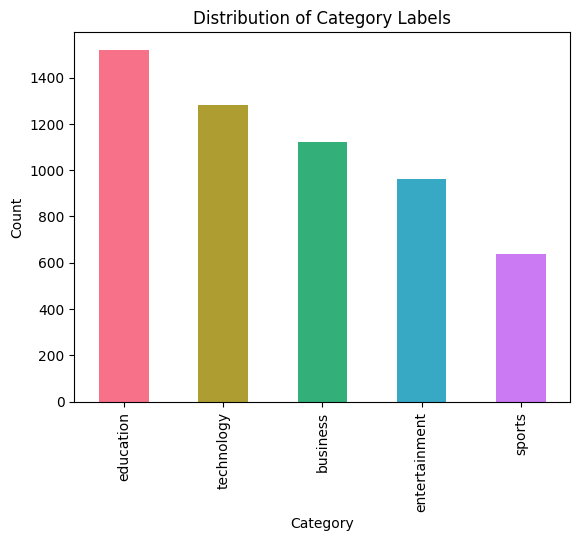

In [ ]:
# Define a color palette
colors = sns.color_palette('husl', len(train_df['category'].value_counts()))

# Visualize the distribution of the categories with colored bars
train_df['category'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Category Labels')
plt.show()


In [ ]:
# Shape of the dataset
train_df.shape
test_df.shape

(2000, 5)

In [ ]:
# Check for missing values
print("Missing values in dataset:\n", train_df.isnull().sum())
print("Missing values in dataset:\n", test_df.isnull().sum())

Missing values in dataset:
 headlines      0
description    0
content        0
url            0
category       0
dtype: int64
Missing values in dataset:
 headlines      0
description    0
content        0
url            0
category       0
dtype: int64


There was no need to handle missing values as there were none

In [ ]:
# Check and remove duplicates
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

if train_df.duplicated().any():
    print("Duplicates are present in the dataset.")
else:
    print("No duplicates found in the dataset.")

if test_df.duplicated().any():
    print("Duplicates are present in the dataset.")

No duplicates found in the dataset.


In [ ]:
# Define a function to preprocess text data
def format_data (text):
    """
    Function to clean text:
    - Convert to lowercase
    - Replace URLs with a placeholder
    - Remove HTML tags
    - Remove punctuation and numbers
    - Tokenize and remove stopwords
    - Lemmatize words
    """
    if isinstance(text, str):
        text = text.lower()  # Convert to lowercase

        # Replace URLs with placeholder
        text = re.sub(r'http\S+|www\S+|https\S+', 'url-web', text, flags=re.MULTILINE)

        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)

        # Remove punctuation and numbers
        text = text.translate(str.maketrans('', '', string.punctuation + '0123456789'))

        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        tokens = [word for word in tokens if word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        return ' '.join(tokens)

    return ""  # Handle missing or invalid data


In [ ]:
# Apply the function to each column in the training dataset
train_df["headlines"] = train_df["headlines"].apply(format_data)
train_df["description"] = train_df["description"].apply(format_data)
train_df["content"] = train_df["content"].apply(format_data)

# Preview the preprocessed data
print(train_df[["headlines", "description", "content"]].head())

                                           headlines  \
0  rbi revise definition politicallyexposed perso...   
1  ndtv q net profit fall r crore impacted lower ...   
2  akasa air ‘ well capitalised ’ grow much faste...   
3  india ’ current account deficit decline sharpl...   
4       state borrowing cost soar highest far fiscal   

                                         description  \
0  central bank also asked chairperson chief exec...   
1  ndtvs consolidated revenue operation r crore r...   
2  initial share sale open public subscription ju...   
3  current account deficit cad per cent gdp usd b...   
4  price shot reflecting overall higher risk aver...   

                                             content  
0  reserve bank india rbi changed definition poli...  
1  broadcaster new delhi television ltd monday re...  
2  homegrown server maker netweb technology india...  
3  india ’ current account deficit declined sharp...  
4  state forced pay nose weekly auction debt tues..

In [ ]:
# Apply the function to each column in the test dataset
test_df["headlines"] = test_df["headlines"].apply(format_data)
test_df["description"] = test_df["description"].apply(format_data)
test_df["content"] = test_df["content"].apply(format_data)

# Preview the preprocessed test data
print(test_df[["headlines", "description", "content"]].head())
# Combine the text columns into a single column for vectorization

                                           headlines  \
0  nlc india win contract power supply rajasthan ...   
1  sbi clerk prelim exam date announced admit car...   
2  golden globe michelle yeoh ferrell angela bass...   
3                oneplus nord r part new price cut ’   
4  adani family ’ partner used ‘ opaque ’ fund in...   

                                         description  \
0  stateowned firm nlc india ltd nlcil monday sai...   
1  sbi clerk prelim exam sbi clerk prelim exam te...   
2  barbie top nominee year followed closely oppen...   
3       new deal make oneplus nord easy purchase r k   
4  citing review file multiple tax haven internal...   

                                             content  
0  stateowned firm nlc india ltd nlcil monday sai...  
1  sbi clerk prelim exam state bank indian sbi an...  
2  michelle yeoh ferrell angela bassett amanda se...  
3  review oneplus nord g praised balanced combina...  
4  million dollar invested publicly traded stock ..

<h3 style="color:blue;">FEATURE ENGENEERING</h3>

In [ ]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer

# Format feature variables
X_train = np.array(train_df['headlines'] + ' ' + train_df['description'] + ' ' + train_df['content'])
X_test = np.array(test_df['headlines'] + ' ' + test_df['description'] + ' ' + test_df['content'])

# Format target variables
y_train = train_df['category']
y_test = test_df['category']

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (5520,)
y_train shape: (5520,)
X_test shape: (2000,)
y_test shape: (2000,)


In [ ]:
# Defining a function to vectorize data
def vectorize_data(X_train, X_test):
    # Initialize CountVectorizer with stop_words handling and minimum document frequency
    vect = CountVectorizer(stop_words='english', min_df=0.01)
    X_train = vect.fit_transform(X_train).toarray()  # Transform and convert to NumPy array
    X_test = vect.transform(X_test).toarray()
    joblib.dump(vect, 'vectorizer.pkl')

    return X_train, X_test

In [ ]:
# Apply vectorization to each column
X_train, X_test = vectorize_data(X_train, X_test)


In [ ]:
# Print results
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (5520, 1636)
X_test shape: (2000, 1636)


<h3 style="color:blue;">TRAINING MODELS</h3>

In [ ]:
# !pip install mlflow when MLflow is not installed
# Set the tracking URI for MLflow
import mlflow
import mlflow.sklearn

In [ ]:
mlflow.set_experiment("News Category Classification")

2025/05/06 09:49:03 INFO mlflow.tracking.fluent: Experiment with name 'News Category Classification' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/187890313000092510', creation_time=1746524943018, experiment_id='187890313000092510', last_update_time=1746524943018, lifecycle_stage='active', name='News Category Classification', tags={}>

In [ ]:
# Import necessary libraries for model training
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(kernel='linear', random_state=42),
    'Naive Bayes': MultinomialNB()
}
# Initialize a dictionary to store the results
results = {}


<h3 style="color:blue;">TRAINING AND EVALUATING MODELS INSIDE MLFLOW</h3>

In [ ]:
# End any active MLflow run
mlflow.end_run()

# Train and evaluate each model inside MLflow tracking
accuracy_results = {}
cm_results = {}

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name, nested=True):  # Only use nested runs
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = model.predict(X_test)

        # Calculate accuracy and store results
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        accuracy_results[model_name] = {'accuracy':accuracy}
        cm_results[model_name] = {'confusion_matrix':cm}

        # Log the model and metrics to MLflow
        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("accuracy",  precision_score(y_test, y_pred, average='weighted'))
        mlflow.log_metric("accuracy",  f1_score(y_test, y_pred, average='weighted'))
        mlflow.log_metric("accuracy",  recall_score(y_test, y_pred, average='weighted'))

        # Print classification report and confusion matrix
        print(f"Model: {model_name}")
        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Accuracy:", accuracy)
        print("-" * 50)

Model: Logistic Regression
Classification Report:
                precision    recall  f1-score   support

     business       0.96      0.96      0.96       400
    education       0.99      0.98      0.99       400
entertainment       0.99      0.98      0.99       400
       sports       0.98      0.99      0.98       400
   technology       0.94      0.95      0.95       400

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000

Accuracy: 0.974
--------------------------------------------------
Model: Random Forest
Classification Report:
                precision    recall  f1-score   support

     business       0.97      0.95      0.96       400
    education       0.97      0.99      0.98       400
entertainment       0.99      0.96      0.98       400
       sports       0.99      0.97      0.98       400
   technology       0.91      0.95      0.93       400

     ac

<h3 style="color:blue;">SELECTING THE BEST MODEL</h3>

In [ ]:
#selecting the best model, using accuracy
best_model = max(accuracy_results, key=lambda model_name: accuracy_results[model_name]['accuracy'])
print(f"Best Model: {best_model}")

# Train the best model on the entire training set
best_model_instance = models[best_model]
best_model_instance.fit(X_train, y_train)

#End run if already running
mlflow.end_run()

# Save the best model to MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(best_model_instance, "Best_model", input_example=X_train[:1])

# Make predictions on the test set
y_test_pred = best_model_instance.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
mlflow.log_metric("test_accuracy", accuracy_test)
report_test = classification_report(y_test, y_test_pred)

# Print the test set results
print("Best model performance on test set:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", report_test)

Best Model: Logistic Regression
Best model performance on test set:
Accuracy: 0.974
Classification Report:
                precision    recall  f1-score   support

     business       0.96      0.96      0.96       400
    education       0.99      0.98      0.99       400
entertainment       0.99      0.98      0.99       400
       sports       0.98      0.99      0.98       400
   technology       0.94      0.95      0.95       400

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000



In [ ]:
# Save the model using joblib
joblib.dump(best_model_instance, 'best_model.pkl')

# Save the predictions to a CSV file
predictions_df = pd.DataFrame({'category': y_test_pred})
predictions_df.to_csv('predictions.csv', index=False)

# Display the first few rows of the predictions DataFrame
display(predictions_df.head())

,category
0,business
1,education
2,entertainment
3,technology
4,business


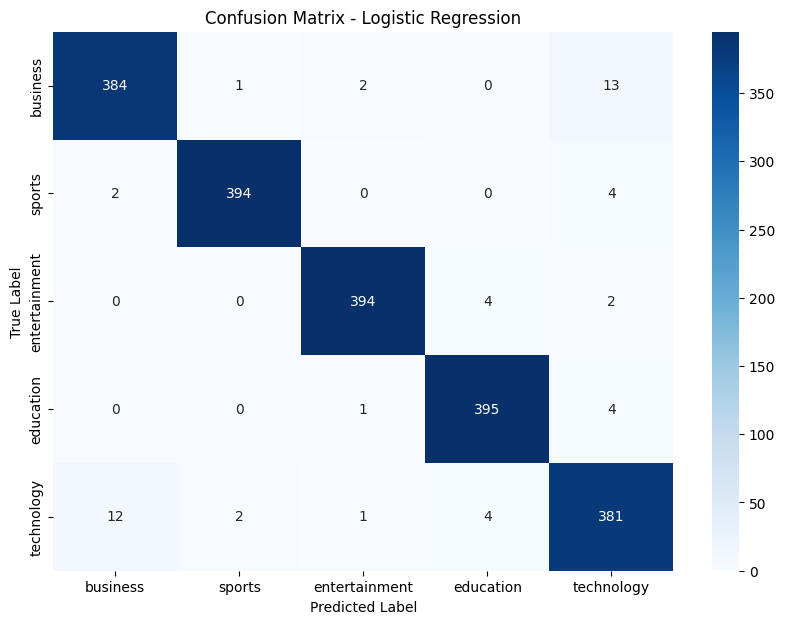

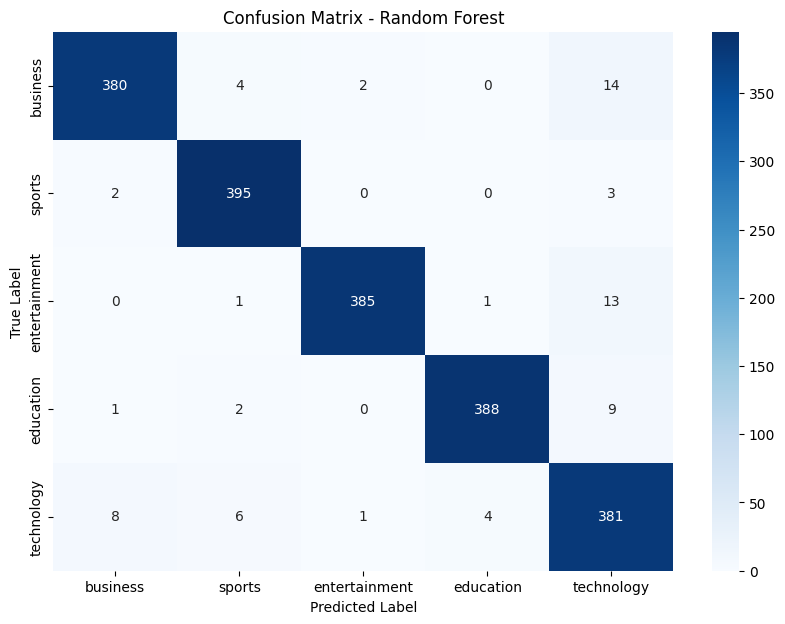

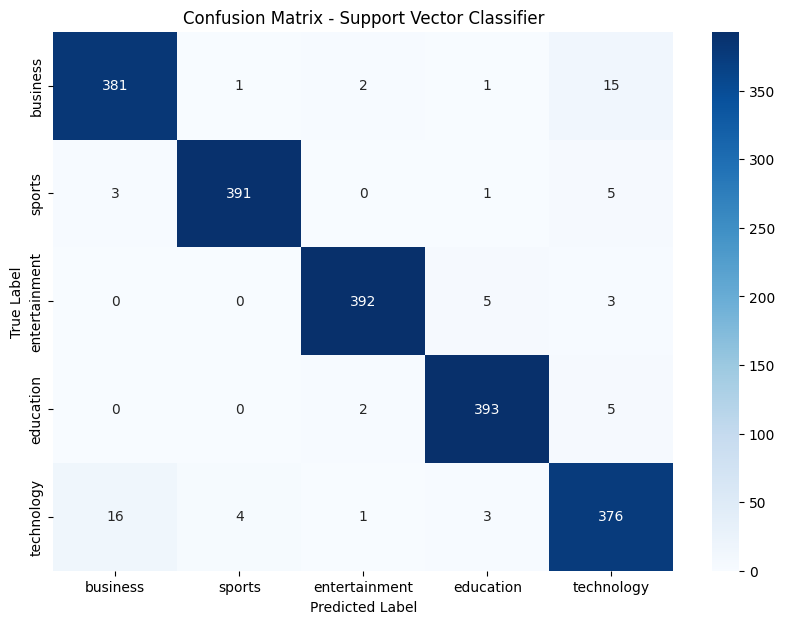

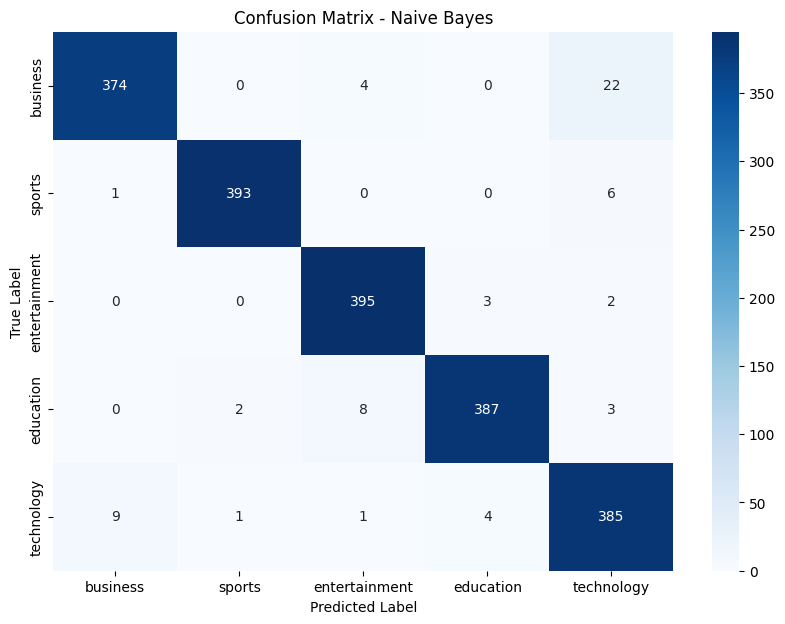

In [ ]:
def plot_confusion_matrix(cm, model_name, labels):
    """Plots the confusion matrix using Seaborn."""
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Get the unique category labels
category_labels = list(train_df.category.unique())

# Plot the confusion matrix for each model
for model_name, data in cm_results.items():
    cm = data['confusion_matrix']
    plot_confusion_matrix(cm, model_name, category_labels)

This confusion matrix visually represents the performance of a classification model in categorizing various topics: business, sports, entertainment, education, and technology. The diagonal values show correct classifications, with Education having the greater correctly classified number and only 4 samples being incorrectly classified( one classified as business and 3 classified as technology)

**solutions to misclassifications:**
Our confusion matrix visualization suggest there is a confusion between certain categories, which may require better feature engineering or tuning of the model.

In [ ]:
# loading saved model and vectorizer and making predictions on new data
loaded_model = joblib.load("best_model.pkl")
loaded_vectorizer = joblib.load("vectorizer.pkl")

def predict_category(headlines, description, content):
    """
    Function to predict the category of a news article.
    """
    headlines = format_data(headlines)
    description = format_data(description)
    content = format_data(content)

    # Vectorize input
    X_new = np.concatenate((
        loaded_vectorizer.transform([headlines]).toarray(),
        loaded_vectorizer.transform([description]).toarray(),
        loaded_vectorizer.transform([content]).toarray()
    ), axis=1)

    return loaded_model.predict(X_new)[0]

In [ ]:
# Run MLflow UI to view the experiment results
!mlflow ui

[2025-05-06 10:29:09 +0000] [11386] [INFO] Starting gunicorn 23.0.0
[2025-05-06 10:29:09 +0000] [11386] [INFO] Listening at: http://127.0.0.1:5000 (11386)
[2025-05-06 10:29:09 +0000] [11386] [INFO] Using worker: sync
[2025-05-06 10:29:09 +0000] [11387] [INFO] Booting worker with pid: 11387
[2025-05-06 10:29:09 +0000] [11388] [INFO] Booting worker with pid: 11388
[2025-05-06 10:29:09 +0000] [11389] [INFO] Booting worker with pid: 11389
[2025-05-06 10:29:09 +0000] [11390] [INFO] Booting worker with pid: 11390


<h3 style="color:blue;">CONCLUSION AND INSIGHTS</h3>

> To conclude, our team built a comprehensive news categorization pipeline, from preprocessing text to training multiple models and evaluating performance using MLflow. The key steps that were taken were:

**1.** Data Preparation – Combined vectorized text features & split into training, validation, and test sets.

**2.** Model Training & Evaluation – Trained Logistic Regression, Random Forest, Naïve Bayes, and SVM, logging accuracy & metrics in MLflow.

**3.** Best Model Selection – Identified the best-performing model dynamically based on validation accuracy.

**4.** Model Deployment – Saved the best model and vectorizer for future predictions using joblib.

**5.** Results Tracking – MLflow logged parameters, accuracy, and confusion matrices, allowing comparison between models.

**6.** Created a Prediction Function – Built a reusable function to classify new articles dynamically.

**Results from MLflow:**
The "Test Accuracy" showed that the best-performing model wasthe Logistic Regression model
, which achieved strong accuracy, with performance tracked across all trained models.
